# CBOW in Keras

In [1]:
import numpy as np

import keras.backend as K
from keras.models import Sequential
from keras.layers import *
from keras.utils import np_utils
from keras.utils.vis_utils import model_to_dot
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer

import gensim
import nltk

from IPython.display import SVG

Using TensorFlow backend.


In [2]:
nltk.download('gutenberg')
nltk.download('punkt')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\ckkim\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ckkim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
sentents = [" ".join(s) for s in nltk.corpus.gutenberg.sents("carroll-alice.txt") if len(s) > 2]

In [4]:
sentents[10]

'The rabbit - hole went straight on like a tunnel for some way , and then dipped suddenly down , so suddenly that Alice had not a moment to think about stopping herself before she found herself falling down a very deep well .'

In [5]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentents)
corpus = tokenizer.texts_to_sequences(sentents)
nb_samples = sum(len(s) for s in corpus)
V = len(tokenizer.word_index) + 1
dim = 100
window_size = 2

In [6]:
def generate_data(corpus, window_size, V):
    maxlen = window_size*2
    for words in corpus:
        L = len(words)
        for index, word in enumerate(words):
            contexts = []
            labels = []
            s = index - window_size
            e = index + window_size + 1

            contexts.append([words[i] for i in range(s, e) if 0 <= i < L and i != index])
            labels.append(word)

            x = sequence.pad_sequences(contexts, maxlen=maxlen)
            y = np_utils.to_categorical(labels, V)
            yield (x, y)

In [7]:
X = []
Y = []
for x, y in generate_data(corpus, window_size, V):
    X.append(x)
    Y.append(y)

X = np.concatenate(X)
Y = np.concatenate(Y)

In [12]:
X.shape, Y.shape

((30179, 4), (30179, 2572))

In [13]:
X[2], np.nonzero(Y[2])

(array([ 12,   1, 475,  13]), (array([20], dtype=int64),))

In [14]:
X[3], np.nonzero(Y[3])

(array([  1,  20,  13, 831]), (array([475], dtype=int64),))

## Model

In [16]:
cbow = Sequential()
cbow.add(Embedding(input_dim=V, output_dim=dim, input_length=window_size*2))
cbow.add(Lambda(lambda x: K.mean(x, axis=1), output_shape=(dim,)))
cbow.add(Dense(V, activation='softmax'))
cbow.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 4, 100)            257200    
_________________________________________________________________
lambda_2 (Lambda)            (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2572)              259772    
Total params: 516,972
Trainable params: 516,972
Non-trainable params: 0
_________________________________________________________________


In [17]:
cbow.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=["accuracy"])

In [18]:
%%time
hist = cbow.fit(X, Y, epochs=1000, batch_size=300, verbose=2)

W1018 14:05:31.343300 17144 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1018 14:05:31.581671 17144 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/1000
 - 5s - loss: 7.7901 - acc: 0.0746
Epoch 2/1000
 - 2s - loss: 7.4012 - acc: 0.0963
Epoch 3/1000
 - 2s - loss: 6.9638 - acc: 0.0977
Epoch 4/1000
 - 2s - loss: 6.6197 - acc: 0.1031
Epoch 5/1000
 - 2s - loss: 6.3782 - acc: 0.1075
Epoch 6/1000
 - 2s - loss: 6.2072 - acc: 0.1120
Epoch 7/1000
 - 2s - loss: 6.0807 - acc: 0.1229
Epoch 8/1000
 - 2s - loss: 5.9830 - acc: 0.1323
Epoch 9/1000
 - 2s - loss: 5.9025 - acc: 0.1384
Epoch 10/1000
 - 2s - loss: 5.8338 - acc: 0.1419
Epoch 11/1000
 - 2s - loss: 5.7740 - acc: 0.1448
Epoch 12/1000
 - 2s - loss: 5.7216 - acc: 0.1467
Epoch 13/1000
 - 2s - loss: 5.6749 - acc: 0.1488
Epoch 14/1000
 - 2s - loss: 5.6321 - acc: 0.1498
Epoch 15/1000
 - 2s - loss: 5.5926 - acc: 0.1511
Epoch 16/1000
 - 2s - loss: 5.5558 - acc: 0.1532
Epoch 17/1000
 - 2s - loss: 5.5212 - acc: 0.1543
Epoch 18/1000
 - 2s - loss: 5.4885 - acc: 0.1562
Epoch 19/1000
 - 2s - loss: 5.4575 - acc: 0.1579
Epoch 20/1000
 - 2s - loss: 5.4276 - acc: 0.1603
Epoch 21/1000
 - 2s - loss: 5

 - 2s - loss: 3.6619 - acc: 0.3329
Epoch 168/1000
 - 2s - loss: 3.6546 - acc: 0.3336
Epoch 169/1000
 - 2s - loss: 3.6474 - acc: 0.3344
Epoch 170/1000
 - 2s - loss: 3.6407 - acc: 0.3347
Epoch 171/1000
 - 2s - loss: 3.6331 - acc: 0.3360
Epoch 172/1000
 - 2s - loss: 3.6264 - acc: 0.3363
Epoch 173/1000
 - 2s - loss: 3.6192 - acc: 0.3373
Epoch 174/1000
 - 2s - loss: 3.6123 - acc: 0.3380
Epoch 175/1000
 - 2s - loss: 3.6050 - acc: 0.3390
Epoch 176/1000
 - 2s - loss: 3.5980 - acc: 0.3394
Epoch 177/1000
 - 2s - loss: 3.5912 - acc: 0.3401
Epoch 178/1000
 - 2s - loss: 3.5841 - acc: 0.3411
Epoch 179/1000
 - 2s - loss: 3.5772 - acc: 0.3412
Epoch 180/1000
 - 2s - loss: 3.5704 - acc: 0.3420
Epoch 181/1000
 - 2s - loss: 3.5637 - acc: 0.3434
Epoch 182/1000
 - 2s - loss: 3.5568 - acc: 0.3432
Epoch 183/1000
 - 2s - loss: 3.5499 - acc: 0.3442
Epoch 184/1000
 - 2s - loss: 3.5433 - acc: 0.3459
Epoch 185/1000
 - 2s - loss: 3.5365 - acc: 0.3457
Epoch 186/1000
 - 2s - loss: 3.5295 - acc: 0.3477
Epoch 187/1000


 - 2s - loss: 2.7240 - acc: 0.4401
Epoch 332/1000
 - 2s - loss: 2.7195 - acc: 0.4400
Epoch 333/1000
 - 2s - loss: 2.7149 - acc: 0.4422
Epoch 334/1000
 - 2s - loss: 2.7103 - acc: 0.4427
Epoch 335/1000
 - 2s - loss: 2.7059 - acc: 0.4426
Epoch 336/1000
 - 2s - loss: 2.7012 - acc: 0.4435
Epoch 337/1000
 - 2s - loss: 2.6966 - acc: 0.4437
Epoch 338/1000
 - 2s - loss: 2.6922 - acc: 0.4449
Epoch 339/1000
 - 2s - loss: 2.6878 - acc: 0.4456
Epoch 340/1000
 - 2s - loss: 2.6831 - acc: 0.4470
Epoch 341/1000
 - 2s - loss: 2.6785 - acc: 0.4458
Epoch 342/1000
 - 2s - loss: 2.6744 - acc: 0.4476
Epoch 343/1000
 - 2s - loss: 2.6698 - acc: 0.4493
Epoch 344/1000
 - 2s - loss: 2.6652 - acc: 0.4493
Epoch 345/1000
 - 2s - loss: 2.6609 - acc: 0.4488
Epoch 346/1000
 - 2s - loss: 2.6562 - acc: 0.4504
Epoch 347/1000
 - 2s - loss: 2.6520 - acc: 0.4503
Epoch 348/1000
 - 2s - loss: 2.6474 - acc: 0.4505
Epoch 349/1000
 - 2s - loss: 2.6430 - acc: 0.4521
Epoch 350/1000
 - 2s - loss: 2.6387 - acc: 0.4525
Epoch 351/1000


 - 2s - loss: 2.1008 - acc: 0.5340
Epoch 496/1000
 - 2s - loss: 2.0973 - acc: 0.5344
Epoch 497/1000
 - 2s - loss: 2.0941 - acc: 0.5356
Epoch 498/1000
 - 2s - loss: 2.0916 - acc: 0.5360
Epoch 499/1000
 - 2s - loss: 2.0883 - acc: 0.5364
Epoch 500/1000
 - 2s - loss: 2.0851 - acc: 0.5372
Epoch 501/1000
 - 2s - loss: 2.0820 - acc: 0.5381
Epoch 502/1000
 - 2s - loss: 2.0793 - acc: 0.5384
Epoch 503/1000
 - 2s - loss: 2.0759 - acc: 0.5375
Epoch 504/1000
 - 2s - loss: 2.0730 - acc: 0.5395
Epoch 505/1000
 - 2s - loss: 2.0701 - acc: 0.5402
Epoch 506/1000
 - 2s - loss: 2.0667 - acc: 0.5408
Epoch 507/1000
 - 2s - loss: 2.0635 - acc: 0.5403
Epoch 508/1000
 - 2s - loss: 2.0607 - acc: 0.5422
Epoch 509/1000
 - 2s - loss: 2.0579 - acc: 0.5434
Epoch 510/1000
 - 2s - loss: 2.0548 - acc: 0.5433
Epoch 511/1000
 - 2s - loss: 2.0517 - acc: 0.5428
Epoch 512/1000
 - 2s - loss: 2.0491 - acc: 0.5439
Epoch 513/1000
 - 2s - loss: 2.0459 - acc: 0.5452
Epoch 514/1000
 - 2s - loss: 2.0424 - acc: 0.5452
Epoch 515/1000


 - 2s - loss: 1.6803 - acc: 0.6162
Epoch 660/1000
 - 2s - loss: 1.6784 - acc: 0.6175
Epoch 661/1000
 - 2s - loss: 1.6760 - acc: 0.6181
Epoch 662/1000
 - 2s - loss: 1.6739 - acc: 0.6176
Epoch 663/1000
 - 2s - loss: 1.6718 - acc: 0.6190
Epoch 664/1000
 - 2s - loss: 1.6697 - acc: 0.6190
Epoch 665/1000
 - 2s - loss: 1.6674 - acc: 0.6184
Epoch 666/1000
 - 2s - loss: 1.6655 - acc: 0.6193
Epoch 667/1000
 - 2s - loss: 1.6636 - acc: 0.6206
Epoch 668/1000
 - 2s - loss: 1.6614 - acc: 0.6216
Epoch 669/1000
 - 2s - loss: 1.6594 - acc: 0.6212
Epoch 670/1000
 - 2s - loss: 1.6574 - acc: 0.6210
Epoch 671/1000
 - 2s - loss: 1.6553 - acc: 0.6222
Epoch 672/1000
 - 2s - loss: 1.6532 - acc: 0.6222
Epoch 673/1000
 - 2s - loss: 1.6512 - acc: 0.6221
Epoch 674/1000
 - 2s - loss: 1.6489 - acc: 0.6222
Epoch 675/1000
 - 2s - loss: 1.6471 - acc: 0.6233
Epoch 676/1000
 - 2s - loss: 1.6451 - acc: 0.6244
Epoch 677/1000
 - 2s - loss: 1.6432 - acc: 0.6248
Epoch 678/1000
 - 2s - loss: 1.6413 - acc: 0.6252
Epoch 679/1000


 - 2s - loss: 1.3958 - acc: 0.6792
Epoch 824/1000
 - 2s - loss: 1.3945 - acc: 0.6808
Epoch 825/1000
 - 2s - loss: 1.3930 - acc: 0.6804
Epoch 826/1000
 - 2s - loss: 1.3916 - acc: 0.6803
Epoch 827/1000
 - 2s - loss: 1.3902 - acc: 0.6810
Epoch 828/1000
 - 2s - loss: 1.3886 - acc: 0.6821
Epoch 829/1000
 - 2s - loss: 1.3873 - acc: 0.6808
Epoch 830/1000
 - 2s - loss: 1.3861 - acc: 0.6813
Epoch 831/1000
 - 2s - loss: 1.3848 - acc: 0.6816
Epoch 832/1000
 - 2s - loss: 1.3830 - acc: 0.6828
Epoch 833/1000
 - 2s - loss: 1.3816 - acc: 0.6830
Epoch 834/1000
 - 2s - loss: 1.3803 - acc: 0.6819
Epoch 835/1000
 - 2s - loss: 1.3789 - acc: 0.6831
Epoch 836/1000
 - 2s - loss: 1.3774 - acc: 0.6843
Epoch 837/1000
 - 2s - loss: 1.3762 - acc: 0.6842
Epoch 838/1000
 - 2s - loss: 1.3746 - acc: 0.6835
Epoch 839/1000
 - 2s - loss: 1.3733 - acc: 0.6856
Epoch 840/1000
 - 2s - loss: 1.3720 - acc: 0.6861
Epoch 841/1000
 - 2s - loss: 1.3704 - acc: 0.6862
Epoch 842/1000
 - 2s - loss: 1.3694 - acc: 0.6848
Epoch 843/1000


 - 2s - loss: 1.2013 - acc: 0.7245
Epoch 988/1000
 - 2s - loss: 1.2008 - acc: 0.7241
Epoch 989/1000
 - 2s - loss: 1.1995 - acc: 0.7240
Epoch 990/1000
 - 2s - loss: 1.1984 - acc: 0.7241
Epoch 991/1000
 - 2s - loss: 1.1976 - acc: 0.7255
Epoch 992/1000
 - 2s - loss: 1.1967 - acc: 0.7251
Epoch 993/1000
 - 2s - loss: 1.1958 - acc: 0.7254
Epoch 994/1000
 - 2s - loss: 1.1945 - acc: 0.7257
Epoch 995/1000
 - 2s - loss: 1.1938 - acc: 0.7263
Epoch 996/1000
 - 2s - loss: 1.1926 - acc: 0.7264
Epoch 997/1000
 - 2s - loss: 1.1916 - acc: 0.7260
Epoch 998/1000
 - 2s - loss: 1.1905 - acc: 0.7278
Epoch 999/1000
 - 2s - loss: 1.1897 - acc: 0.7268
Epoch 1000/1000
 - 2s - loss: 1.1888 - acc: 0.7265
Wall time: 32min 6s


In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

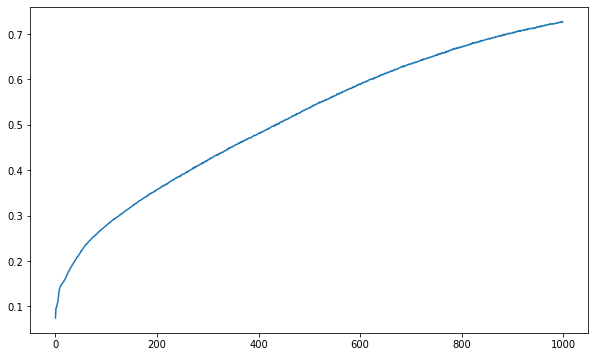

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(hist.history['acc'])
plt.show()

## Word2Vec

In [22]:
vectors = cbow.get_weights()[0]